In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Gensim
from gensim.corpora.dictionary import Dictionary

IMPORT DATA

In [16]:
df = pd.read_csv('bow_df.csv')
# 결측치 제거
df = df.dropna()

company_name = df.company_name
company_name.to_csv("company_name.csv")
other_var = df.drop(['company_name','adv','dadv','Unnamed: 0'],axis=1)
other_var.to_csv("other_var.csv")

TOKENIZING

In [17]:
# Word Count
from konlpy.tag import Okt

t = Okt()

def my_tokenizer(doc):
    return [
        token
        for token, pos in t.pos(doc)
        if len(token)>1
    ]

In [18]:
text_adv = [my_tokenizer(text) for text in df.adv]
text_dadv = [my_tokenizer(text) for text in df.dadv]

In [19]:
dictionary_adv = Dictionary(text_adv)
dictionary_dadv = Dictionary(text_dadv)
print('#Number of initial unique words in adv_documents:',len(dictionary_adv))
print('#Number of initial unique words in dadv_documents:',len(dictionary_dadv))

dictionary_adv.filter_extremes(keep_n = 2000, no_below = 10, no_above = 0.5)
dictionary_dadv.filter_extremes(keep_n = 2000, no_below = 10, no_above = 0.5)

print("#Number of unique words after removing rae and common words:", len(dictionary_adv))
print("#Number of unique words after removing rae and common words:", len(dictionary_dadv))

corpus_adv = [dictionary_adv.doc2bow(text) for text in text_adv]
corpus_dadv = [dictionary_dadv.doc2bow(text) for text in text_dadv]
print('#Number of unique tokens: %d' % len(dictionary_adv))
print('#Number of documents: %d' % len(corpus_adv))

print('#Number of unique tokens: %d' % len(dictionary_dadv))
print('#Number of documents: %d' % len(corpus_dadv))


#Number of initial unique words in adv_documents: 49505
#Number of initial unique words in dadv_documents: 81585
#Number of unique words after removing rae and common words: 2000
#Number of unique words after removing rae and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 2503
#Number of unique tokens: 2000
#Number of documents: 2503


In [20]:
import pickle
with open('corpus_adv_no_preprocessing.pkl', 'wb') as lf:
    pickle.dump(corpus_adv, lf)

In [21]:
import pickle
with open('corpus_dadv_no_preprocessing.pkl', 'wb') as lf:
    pickle.dump(corpus_dadv, lf)

LDA MODEL

In [22]:
from gensim.models import LdaModel

num_topics_adv = 6
passes = 5
model_adv = LdaModel(corpus = corpus_adv, id2word = dictionary_adv,passes = passes, num_topics = num_topics_adv,random_state = 7)
model_adv.save("tp_adv_model_no_preprocessing")

In [23]:
num_topics_dadv = 7
model_dadv = LdaModel(corpus = corpus_dadv, id2word = dictionary_dadv,passes = passes, num_topics = num_topics_dadv,random_state = 7)
model_dadv.save("tp_dadv_model_no_preprocessing")

In [24]:
print('ADV')
print(model_adv.print_topics(num_words=10))
print('\n DADV')
print(model_dadv.print_topics(num_words=10))
# print('#topic distribution of the first document:',model.get_document_topics(corpus)[0])

ADV
[(0, '0.007*"높은" + 0.006*"지급" + 0.006*"수당" + 0.006*"영업" + 0.006*"밀리" + 0.005*"나옴" + 0.004*"일이" + 0.004*"업계" + 0.004*"따라" + 0.004*"초봉"'), (1, '0.016*"대기업" + 0.008*"높은" + 0.007*"안정" + 0.007*"포인트" + 0.007*"할인" + 0.006*"부바" + 0.006*"강도" + 0.005*"그룹" + 0.005*"괜찮은" + 0.005*"않은"'), (2, '0.011*"재택근무" + 0.007*"유연근무제" + 0.006*"부바" + 0.006*"자율" + 0.006*"재택" + 0.006*"포인트" + 0.005*"제도" + 0.005*"데이" + 0.005*"롭고" + 0.005*"출근"'), (3, '0.014*"\n \n" + 0.007*"서울" + 0.007*"공공기관" + 0.006*"기회" + 0.006*"안정" + 0.005*"높은" + 0.005*"일이" + 0.005*"할인" + 0.005*"동료" + 0.005*"대한"'), (4, '0.015*"기숙사" + 0.014*"버스" + 0.012*"통근" + 0.011*"점심" + 0.011*"맛있음" + 0.010*"저녁" + 0.009*"식당" + 0.008*"식사" + 0.007*"수당" + 0.007*"아침"'), (5, '0.012*"점심" + 0.011*"카페" + 0.010*"커피" + 0.010*"사내" + 0.009*"건물" + 0.009*"식대" + 0.008*"사옥" + 0.008*"간식" + 0.006*"사무실" + 0.006*"구내식당"')]

 DADV
[(0, '0.015*"영업" + 0.006*"보수" + 0.006*"조직" + 0.006*"대비" + 0.005*"승진" + 0.005*"성장" + 0.005*"압박" + 0.005*"낮음" + 0.005*"실적" + 0.004*"수직"'), (1, '0.009*"계약" 

TOPIC MODELING COMPARISON(based on # topics)

In [25]:
# # topic_modeling csv file
# num_topic_list_adv = [9]
# num_topic_list_dadv = [7]

# save_adv = {}
# save_dadv = {}
# for i in num_topic_list_adv:
#     model = LdaModel(corpus = corpus_adv, id2word = dictionary_adv,passes = passes, num_topics = i,random_state = 7)
#     save_adv[i] = model.print_topics(num_words=8)

# for i in num_topic_list_dadv:
#     model = LdaModel(corpus = corpus_dadv, id2word = dictionary_dadv,passes = passes, num_topics = i,random_state = 7)
#     save_dadv[i] = model.print_topics(num_words=8)

# topic_adv_csv = pd.DataFrame.from_dict(save_adv, orient='index')
# topic_adv_csv.to_csv("adv_topic_selection.csv")

# topic_dadv_csv = pd.DataFrame.from_dict(save_dadv, orient='index')
# topic_dadv_csv.to_csv("dadv_topic_selection.csv")

TOPIC MODELING OUTPUT

In [26]:
output_df_adv = pd.DataFrame({'company_name':df.company_name})
for col in range(num_topics_adv):
    tmp = str(col)
    output_df_adv[tmp] = float(0)
output_df_adv.index = [i for i in range(len(output_df_adv))]


In [27]:
output_df_dadv = pd.DataFrame({'company_name':df.company_name})
for col in range(num_topics_dadv):
    tmp = str(col)
    output_df_dadv[tmp] = float(0)
output_df_dadv.index = [i for i in range(len(output_df_dadv))]


In [28]:
for i, dt in enumerate(model_adv.get_document_topics(corpus_adv)):
    for val in dt:

        idx = str(val[0])
        pt = val[1]

        output_df_adv.at[i,idx] = pt

In [29]:
for i, dt in enumerate(model_dadv.get_document_topics(corpus_dadv)):
    for val in dt:

        idx = str(val[0])
        pt = val[1]

        output_df_dadv.at[i,idx] = pt

In [30]:
# to csv file
output_df_adv.to_csv('adv_topic_modeling_no_preprocesing.csv')
output_df_dadv.to_csv('dadv_topic_modeling_no_preprocesing.csv')

In [53]:
adv_cols = ['company_name']+['adv_topic_'+str(i) for i in range(len(output_df_adv.columns)-1)]
dadv_cols = ['company_name']+['dadv_topic_'+str(i) for i in range(len(output_df_dadv.columns)-1)]
output_df_adv.columns = adv_cols
output_df_dadv.columns = dadv_cols

In [54]:
output_df = output_df_adv.merge(output_df_dadv,left_on = 'company_name', right_on = 'company_name')
output_df

,company_name,adv_topic_0,adv_topic_1,adv_topic_2,adv_topic_3,adv_topic_4,adv_topic_5,dadv_topic_0,dadv_topic_1,dadv_topic_2,dadv_topic_3,dadv_topic_4,dadv_topic_5,dadv_topic_6
0,국민건강보험공단,0.000000,0.000000,0.687372,0.302117,0.000000,0.000000,0.000000,0.048617,0.876745,0.019960,0.036149,0.000000,0.018385
1,근로복지공단,0.000000,0.000000,0.898357,0.099757,0.000000,0.000000,0.000000,0.098602,0.784741,0.013738,0.046056,0.000000,0.056697
2,농협은행,0.176674,0.506896,0.029714,0.286448,0.000000,0.000000,0.413914,0.085252,0.388159,0.000000,0.077294,0.000000,0.026577
3,현대카드,0.000000,0.266990,0.289331,0.000000,0.082022,0.361301,0.198092,0.355471,0.000000,0.230317,0.000000,0.049685,0.162927
4,중소기업은행,0.000000,0.341051,0.000000,0.658176,0.000000,0.000000,0.461317,0.000000,0.537841,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,유끼커뮤니케이션,0.010481,0.010481,0.010533,0.010519,0.010519,0.947466,0.000000,0.000000,0.000000,0.959036,0.000000,0.000000,0.000000
2499,투어이천,0.281603,0.488103,0.198677,0.010537,0.010538,0.010543,0.000000,0.000000,0.000000,0.000000,0.949345,0.000000,0.000000
2500,휴먼코아,0.995102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352978,0.000000,0.000000,0.470019,0.000000,0.173178
2501,에이치엔씨네트워크,0.526662,0.187961,0.000000,0.000000,0.000000,0.280168,0.019182,0.216211,0.000000,0.000000,0.669438,0.000000,0.090043


In [55]:
output_df.to_csv("tp_df_no_preprocessing.csv")

In [31]:
from gensim.models import CoherenceModel

cm_adv = CoherenceModel(model= model_adv, corpus= corpus_adv, coherence= 'u_mass')
cm_dadv = CoherenceModel(model= model_dadv, corpus= corpus_dadv, coherence= 'u_mass')

coherence_adv = cm_adv.get_coherence()
coherence_dadv = cm_dadv.get_coherence()

print(coherence_adv)
print(coherence_dadv)

-0.8541177306147181
-0.7079803669193115


num_topics: 3, perplexity: -7.101, coherence: -0.746
num_topics: 4, perplexity: -7.104, coherence: -0.772
num_topics: 5, perplexity: -7.107, coherence: -0.799
num_topics: 6, perplexity: -7.106, coherence: -0.753
num_topics: 7, perplexity: -7.112, coherence: -0.732
num_topics: 8, perplexity: -7.114, coherence: -0.759
num_topics: 9, perplexity: -7.120, coherence: -0.776
num_topics: 10, perplexity: -7.128, coherence: -0.763
num_topics: 11, perplexity: -7.130, coherence: -0.794
num_topics: 12, perplexity: -7.132, coherence: -0.786
num_topics: 13, perplexity: -7.133, coherence: -0.786
num_topics: 14, perplexity: -7.143, coherence: -0.779
num_topics: 15, perplexity: -7.148, coherence: -0.787
num_topics: 16, perplexity: -7.153, coherence: -0.760


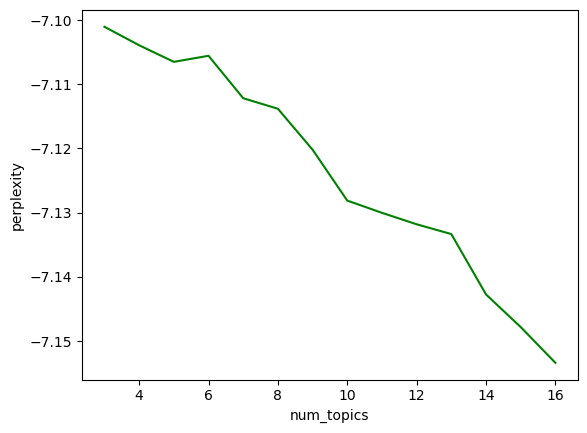

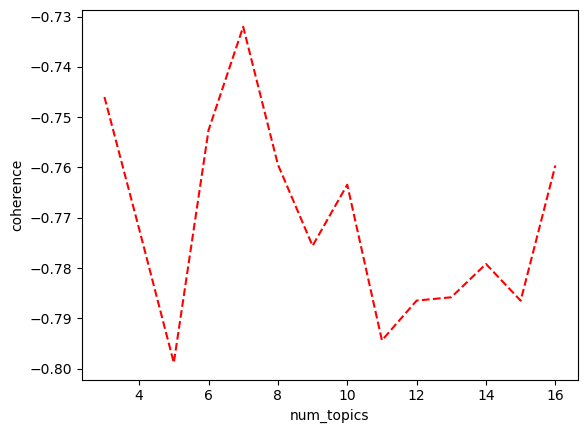

In [32]:
def show_coherence(corpus, dictionary, start = 6, end = 15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end+1):
        model = LdaModel(corpus = corpus, id2word = dictionary, chunksize=1000, num_topics = i,random_state = 7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')
    
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()
# 5, 14
show_coherence(corpus_adv, dictionary_adv, start = 3, end = 16)

num_topics: 3, perplexity: -7.233, coherence: -0.621
num_topics: 4, perplexity: -7.238, coherence: -0.622
num_topics: 5, perplexity: -7.245, coherence: -0.620
num_topics: 6, perplexity: -7.248, coherence: -0.638
num_topics: 7, perplexity: -7.251, coherence: -0.630
num_topics: 8, perplexity: -7.258, coherence: -0.630
num_topics: 9, perplexity: -7.264, coherence: -0.624
num_topics: 10, perplexity: -7.267, coherence: -0.630
num_topics: 11, perplexity: -7.273, coherence: -0.657
num_topics: 12, perplexity: -7.280, coherence: -0.686
num_topics: 13, perplexity: -7.285, coherence: -0.656
num_topics: 14, perplexity: -7.294, coherence: -0.666
num_topics: 15, perplexity: -7.298, coherence: -0.692
num_topics: 16, perplexity: -7.304, coherence: -0.670


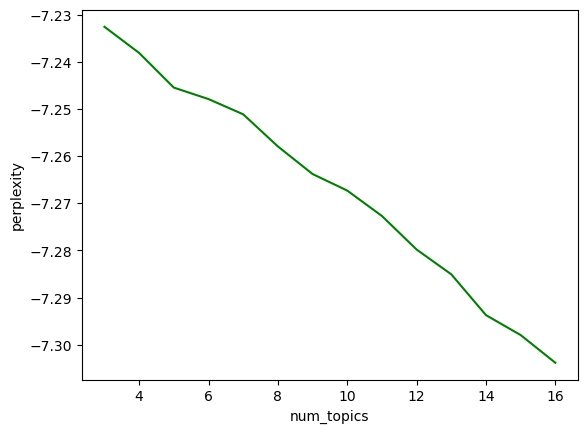

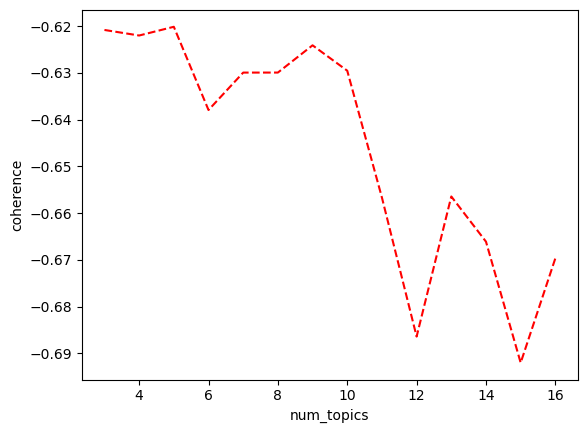

In [33]:
show_coherence(corpus_dadv, dictionary_dadv, start = 3, end = 16)
